In [165]:
!pip install yfinance

In [166]:
!pip install pandas_ta

In [169]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta



In [170]:
data = yf.download('AAPL', start = "2021-01-01" , end = "2023-04-30" )
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164169,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736404,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402916,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647934,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758331,105158200


# MOVING AVERAGE

<Axes: xlabel='Date'>

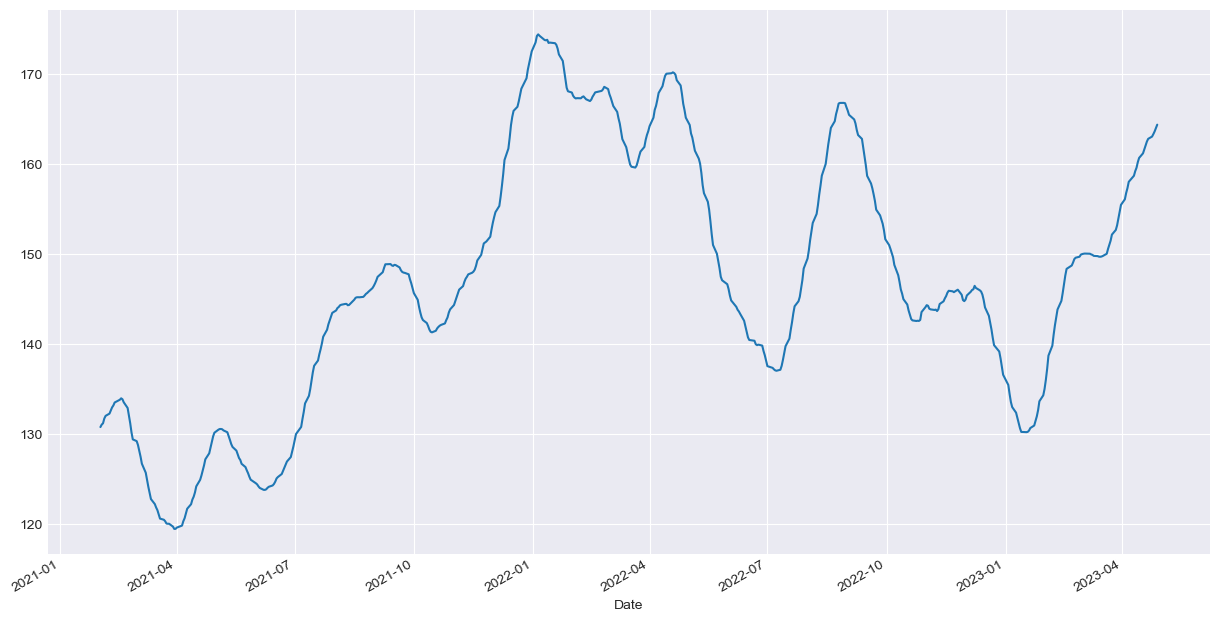

In [172]:
data['Adj Close'].rolling(window = 20).mean().plot()

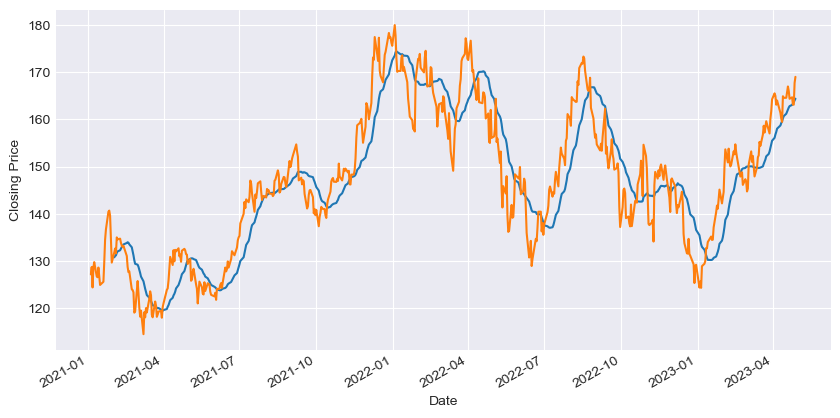

In [247]:
plt.figure(figsize = (10,5))
plt.ylabel('Closing Price')
data["Adj Close"].rolling(window = 20).mean().plot()
data["Adj Close"].plot()
plt.show()


# RSI 

<Axes: xlabel='Date', ylabel='Value'>

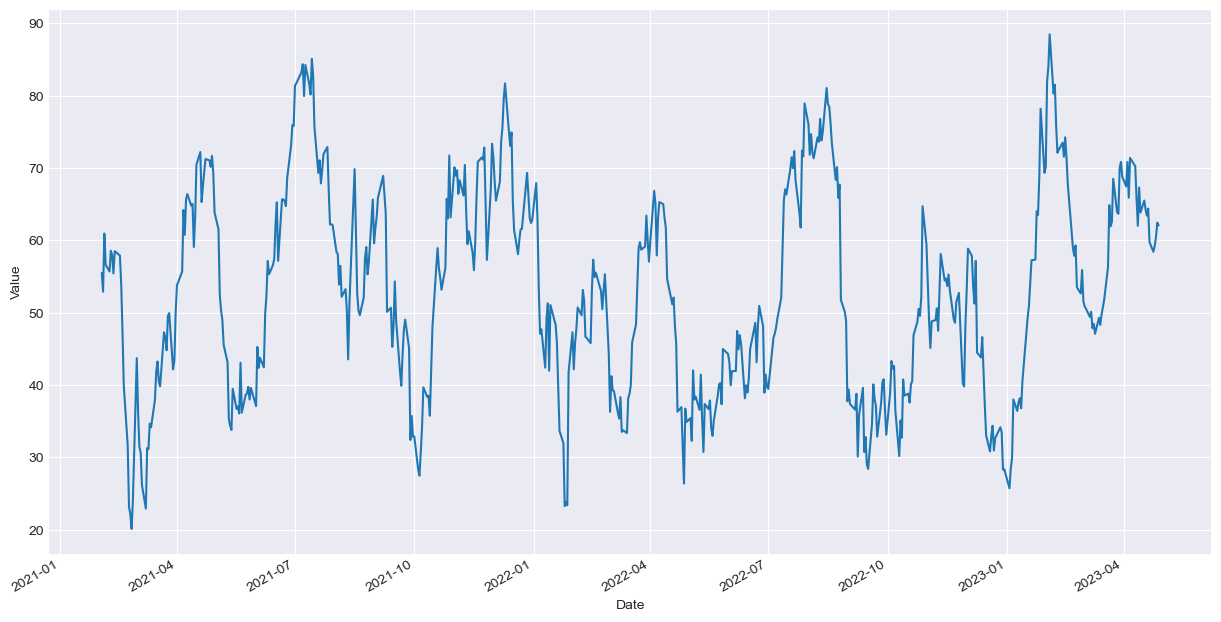

In [191]:

def RSI(data,column,n):
    delta = data[column].diff()
    dUp = delta.copy()
    dDown = delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    Rollup = dUp.rolling(window=n).mean()
    Rolldown = dDown.rolling(window=n).mean().abs()

    RS = Rollup / Rolldown
    RSIF = 100.0 - (100.0 / (1.0 + RS))
    return RSIF

plt.ylabel('Value')
RSI(data,'Adj Close',20).plot()

<Axes: xlabel='Date'>

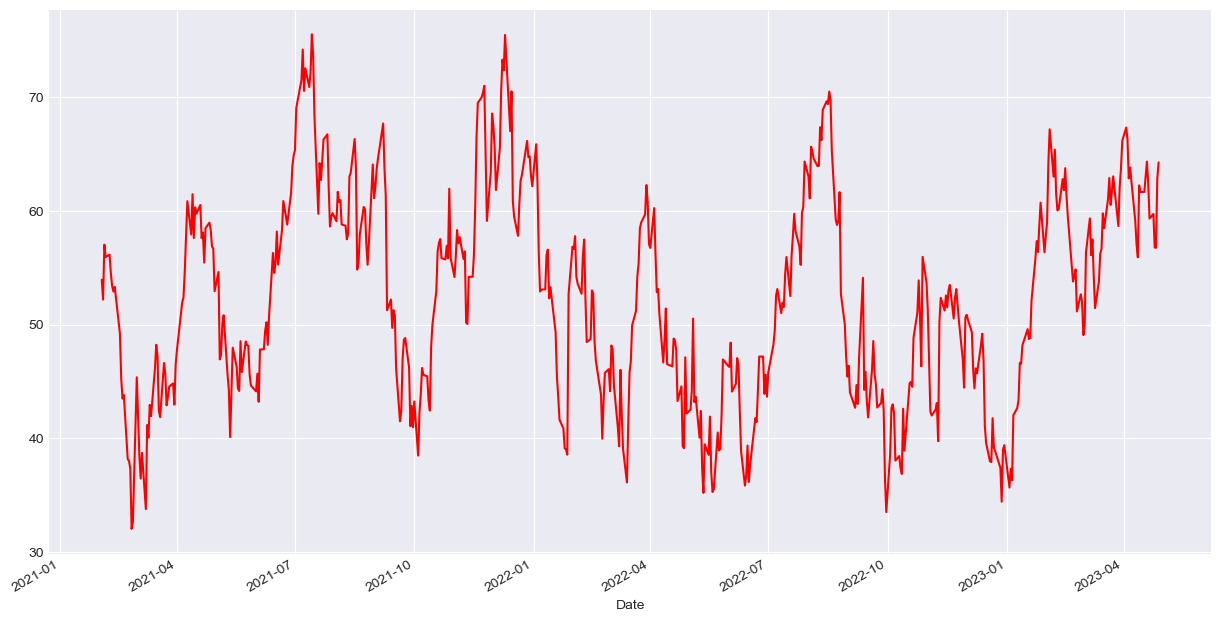

In [265]:
data['rsi'] = data.ta.rsi(length = 20 , append = True)
data.ta.rsi(length = 20 , append = True).plot(color = 'red')

# EMA

In [205]:

def eMA(data, column, period, ratio):
    '''
    ema = [data[column].iloc[0]] * period  # Initialize ema with the first 'period' data points

    for i in range(period, len(data)):
        ema.append((data[column].iloc[i] * wf) + ema[i - 1] * (1 - wf))

    return pd.Series(ema, index=data.index)
    '''
    ema_series = pd.Series(0,index = range(len(data)))
    for i in range(period,len(data)):
        current_ema = 0
        power = 1
        for j in range(i,i-period-1,-1):
            current_ema += data[column].iloc[j]*(ratio**(power))
            power += 1
        current_ema /= (ratio*(ratio**(period)-1))/(ratio-1)
        ema_series[i] = current_ema
    return ema_series




<Axes: xlabel='Date'>

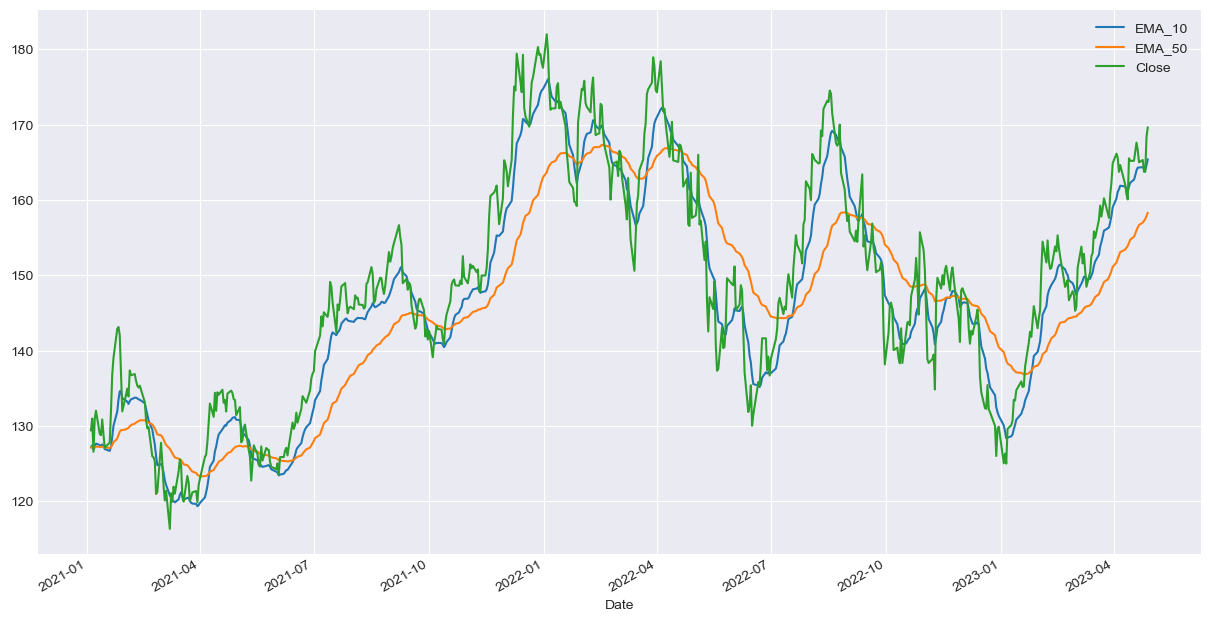

In [255]:
data['EMA_10'] = data['Adj Close'].ewm(span = 10,adjust = False).mean()
data['EMA_50'] = data['Adj Close'].ewm(span = 50,adjust = False).mean()
data[['EMA_10','EMA_50','Close']].plot()

In [256]:
#ema_series_10 = EMA(data,'Adj Close',10,0.5)
#ema_series_20 = EMA(data,'Adj Close',20,0.5)
#plt.plot(data.index,ema_series_10,color='red',label='EMA_10')
#plt.plot(data.index,ema_series_20,color='green',label='EMA_20')
#plt.show()

In [257]:
#ema_series_20 = EMA(data,'Adj Close',20,0.5)
#ema_series_20.plot()

In [258]:
#ema_series_10.iloc[19:] - ema_series_20.iloc[19:]

<Axes: xlabel='Date'>

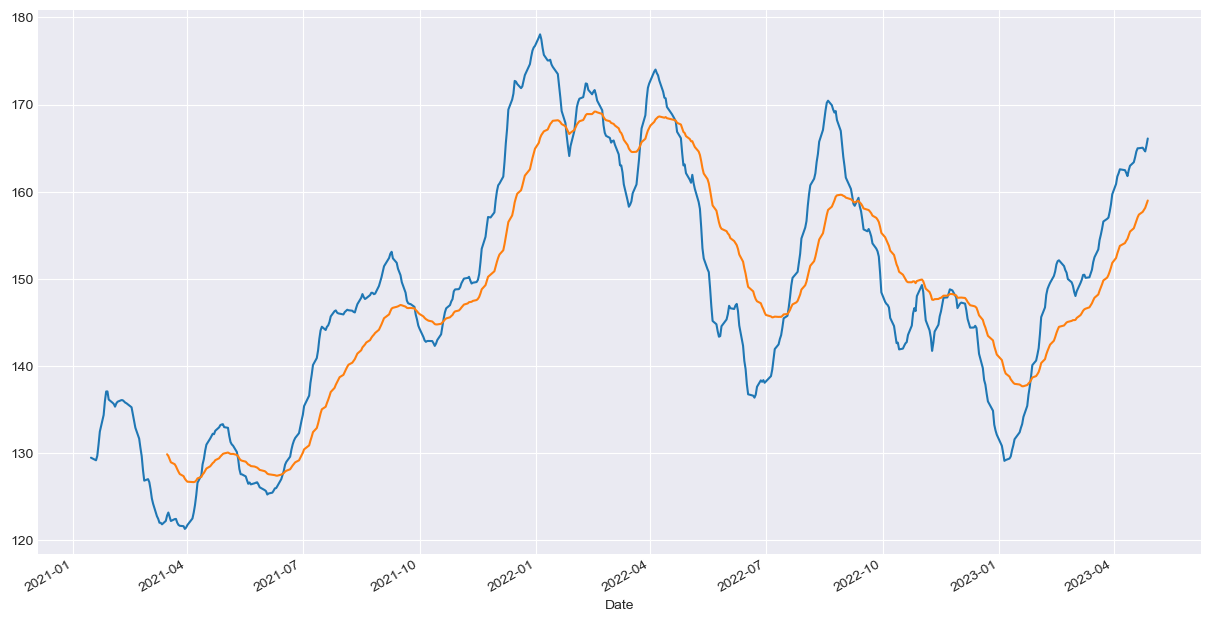

In [259]:
data.ta.ema(length = 20,append = True)
data.ta.ema(length = 10,append = True).plot()
data.ta.ema(length = 50,append = True).plot()

# BOLLINGER BANDS

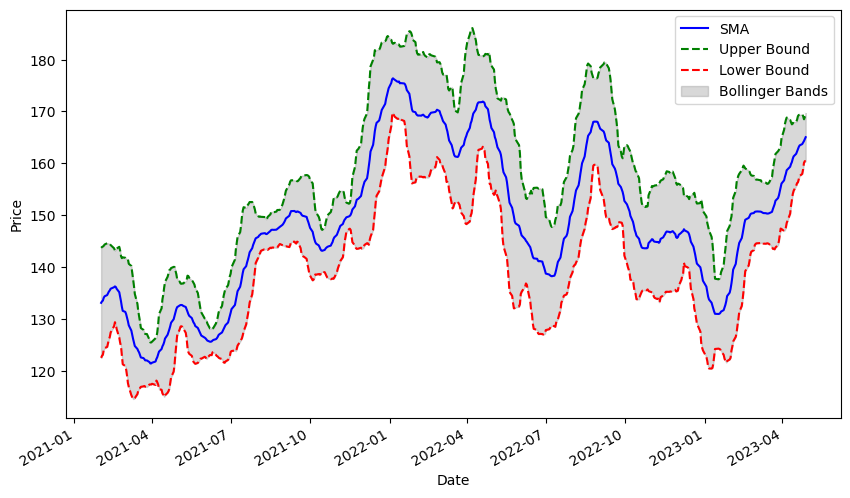

In [42]:

data['SMA'] = data['Close'].rolling(window=20).mean()


data['SD'] = data['Close'].rolling(window=20).std()


data['UB'] = data['SMA'] + 2 * data['SD']
data['LB'] = data['SMA'] - 2 * data['SD']

plt.figure(figsize=(10, 6))
plt.ylabel('Price')

data['SMA'].plot(label='SMA', color='blue')

data['UB'].plot(label='Upper Bound', linestyle='--', color='green')
data['LB'].plot(label='Lower Bound', linestyle='--', color='red')


plt.fill_between(data.index, data['UB'], data['LB'], color='gray', alpha=0.3, label='Bollinger Bands')


plt.legend()


plt.show()



## MACD

<Axes: xlabel='Date'>

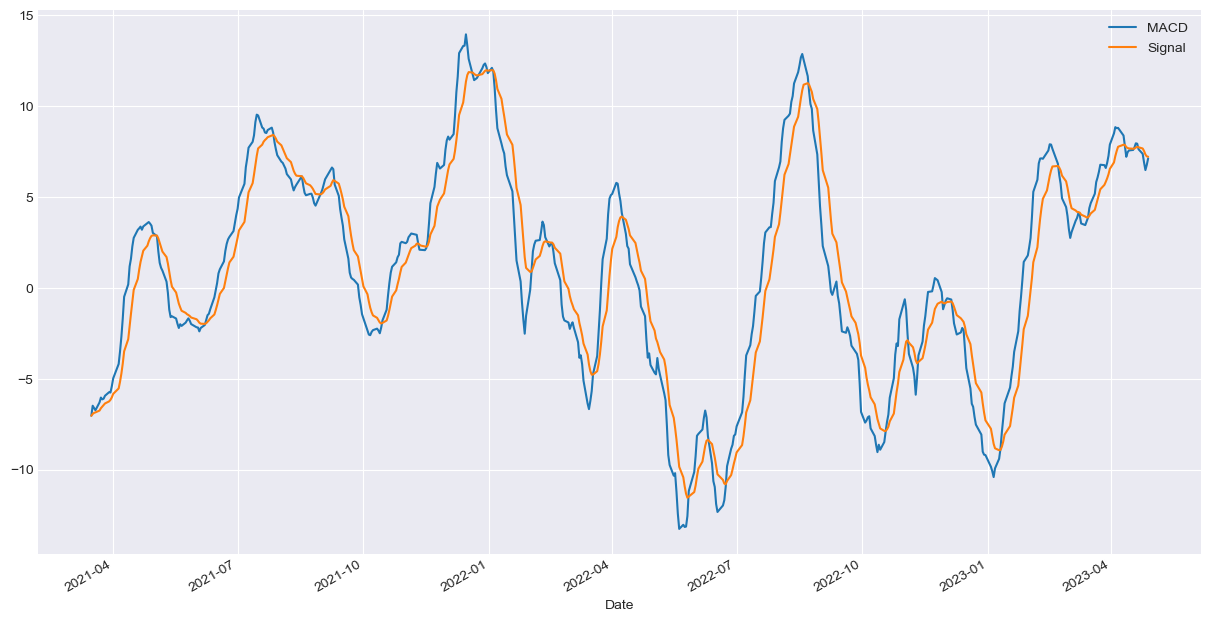

In [264]:
data['EMA_20']= data['Adj Close'].ewm(span = 20,adjust = False).mean()
data['MACD']= data['EMA_10']-data['EMA_50']
data['Signal']= data['MACD'].ewm(span = 10,adjust = False).mean()
data[['MACD','Signal']].plot()


#  TRADING STRATEGY-2


After implementing various indicators in python we now want to create a basic trading strategy using SMA AND RSI.

In [282]:
import warnings
warnings.filterwarnings('ignore')
df = data.copy()
def Get_signals(df):
    df['Signal']=0
    df.loc[(df['EMA_20']>df['EMA_50'])&(df['rsi']<42),'Signal']=1
    df.loc[(df['EMA_20']<df['EMA_50'])&(df['rsi']>62),'Signal']=-1
    return df
Get_signals(df)
print(df['Signal'])
print(df['Signal'].value_counts())



Date
2021-01-04    0
2021-01-05    0
2021-01-06    0
2021-01-07    0
2021-01-08    0
             ..
2023-04-24    0
2023-04-25    0
2023-04-26    0
2023-04-27    0
2023-04-28    0
Name: Signal, Length: 584, dtype: int64
Signal
 0    577
 1      4
-1      3
Name: count, dtype: int64


In [267]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA_20,EMA_10,EMA_50,MACD,Signal,RSI_20,rsi
Date,,,,,,,,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.662048,41949600,162.548086,165.053623,157.687192,7.366431,7.660828,59.737015,59.737015
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.108353,48714100,162.601445,164.820238,157.925734,6.894504,7.521497,56.782398,56.782398
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.098389,45498800,162.648773,164.627466,158.154528,6.472938,7.330850,56.763435,56.763435
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.729614,64902300,163.132663,165.315200,158.556704,6.758497,7.226785,62.832943,62.832943
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.994461,55209200,163.690929,166.108799,158.992911,7.115888,7.206622,64.274728,64.274728


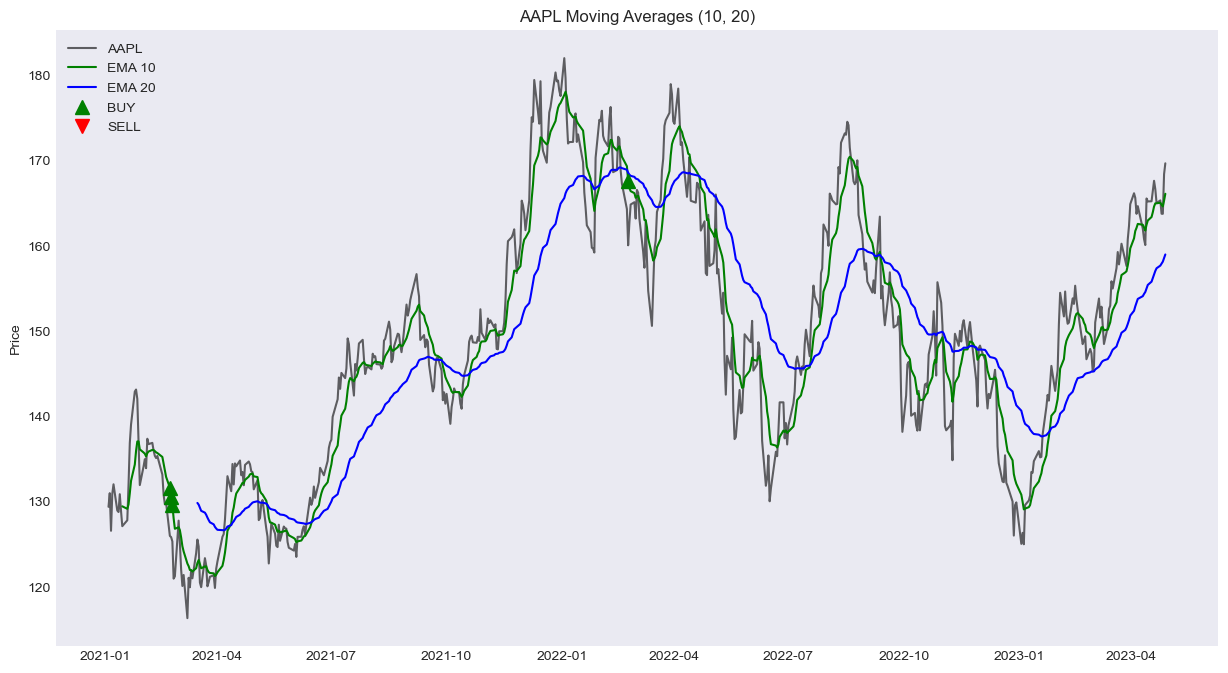

In [276]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.grid()
plt.ylabel("Price")
plt.plot(data['Close'], label = 'AAPL', color = 'k',alpha = 0.6)
plt.plot(data['EMA_10'], label = 'EMA 10',color = 'g')
plt.plot(data['EMA_50'], label = 'EMA 20', color = 'b')
plt.plot(df[df["Signal"] == 1].index, 
         df['EMA_10'][df["Signal"] == 1], 
         "^", markersize = 10, color = 'g', label = 'BUY')
plt.plot(df[df["Signal"] == -1].index, 
         df['EMA_50'][df["Signal"] == -1], 
         "v", markersize = 10, color = 'r', label = 'SELL')
plt.title('AAPL Moving Averages (10, 20)')
plt.legend(loc = 'upper left')
plt.show()


# TRADING STRATEGY - 3

## BUY AND HOLD(BENCHMARK)

In [83]:
import bs4 as bs
import requests
import datetime

In [84]:
# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [123]:
# Covert (the ticker)'MMM' column to list
ticker_symbol = tickers['Symbol'].tolist()

# Clean the symbols
ticker_symbol = [ticker.replace(".","-") for ticker in ticker_symbol]

# Get the data for this tickers from yfinance
data = yf.download(ticker_symbol,'2017-1-1','2023-1-1', auto_adjust=True)['Close']
data.head()

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['VLTO', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1483246800, endDate = 1672549200")


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.047405,44.741222,27.023710,45.449177,NaN,34.296658,28.629999,104.167435,103.480003,63.237152,...,80.401535,33.062611,65.099442,54.809013,45.571266,55.813774,95.016685,86.250000,35.510899,51.009789
2017-01-04,44.625340,45.127769,26.993458,46.090015,NaN,34.568924,28.833332,104.417870,104.139999,63.106316,...,82.993950,33.209118,64.383209,55.257797,46.250473,56.016861,95.890244,87.029999,36.020779,51.504742
2017-01-05,44.094776,44.345028,27.130728,46.439579,NaN,34.867527,28.540001,102.852592,105.910004,62.199326,...,84.060326,33.209118,63.423458,54.537861,45.828259,56.202293,96.506348,84.750000,35.436878,51.333412
2017-01-06,45.468582,44.654259,27.433193,46.454144,NaN,35.816074,28.823334,104.024300,108.300003,62.443504,...,84.970421,33.306774,63.387630,54.500450,45.507004,56.882195,96.515533,85.959999,35.667156,51.495232
2017-01-09,45.610703,45.494972,27.684467,46.760006,NaN,35.780945,28.406668,102.861534,108.570000,62.740055,...,85.264610,32.802143,62.341915,54.668766,45.314259,57.041126,98.391411,85.970001,35.280628,51.352451


In [124]:

data.tail()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,147.932907,12.71,131.127075,155.283310,85.250000,105.548416,63.380001,260.975525,338.450012,160.778214,...,80.091263,68.115936,105.091942,31.219860,108.321198,126.519447,125.714478,248.220001,46.140099,144.115540
2022-12-27,148.250137,12.53,129.307220,155.178574,83.489998,105.928925,63.619999,260.210510,335.089996,159.168869,...,83.673141,68.730545,106.552094,31.455261,109.298492,127.500969,126.299927,251.000000,46.511501,143.660751
2022-12-28,146.802811,12.32,125.339417,154.454987,82.489998,105.206924,62.599998,258.062622,328.329987,157.284760,...,79.466171,68.235489,104.801842,30.386156,107.541344,126.921883,125.019859,246.839996,45.682983,142.207321
2022-12-29,149.776733,12.70,128.889557,154.769180,85.230003,107.626595,63.110001,263.221558,337.579987,160.915604,...,80.627060,68.718948,105.594772,31.789503,110.206673,127.589333,126.845703,257.529999,46.740059,146.478577
2022-12-30,148.570496,12.72,129.207779,153.864700,85.500000,107.119247,62.779999,261.711090,336.529999,160.964676,...,81.827637,67.790703,106.658470,31.356190,109.150406,125.714600,126.518242,256.410004,46.816246,144.896637


In [125]:
daily_returns = data.pct_change()

# Calculate yearly returns for each stock
# Note: This assumes that you have at least one observation for each day in a year
# If not, you may need to resample the data to a frequency where there's at least one observation per year
yearly_returns = daily_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Display the yearly returns
print(yearly_returns)

                   A       AAL      AAPL      ABBV      ABNB       ABT  \
Date                                                                     
2017-12-31  0.453509  0.133449  0.480425  0.606135  0.000000  0.495366   
2018-12-31  0.016654 -0.376891 -0.053902 -0.009565  0.000000  0.290618   
2019-12-31  0.275396 -0.095719  0.889578  0.014682  0.000000  0.220802   
2020-12-31  0.397909 -0.448107  0.823067  0.277183  0.014443  0.280407   
2021-12-31  0.355096  0.138871  0.346482  0.324260  0.134128  0.305283   
2022-12-31 -0.055227 -0.291759 -0.264042  0.240077 -0.486456 -0.206819   

                ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
Date                                                ...                       
2017-12-31  0.056817  0.341030  0.693467  0.254914  ...  0.959390  0.221530   
2018-12-31 -0.116889 -0.062287  0.291029 -0.016391  ... -0.401802  0.058790   
2019-12-31  0.605165  0.512136  0.457788  0.413095  ...  0.449950  0.323713   
2020-12-31 -

In [131]:

portfolio_returns = yearly_returns.mean(axis =1)
cum_portfolio_returns = (portfolio_returns+1).cumprod()

In [135]:
df_1 = yf.download(ticker_symbol,'2022-1-1','2023-1-1', auto_adjust=True)['Close']

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['VLTO', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672549200")


In [138]:
df_1.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,154.335785,18.750000,179.953888,124.095062,172.679993,133.418869,44.549999,394.007874,564.369995,170.609253,...,87.086349,63.911671,59.097824,55.229942,113.907425,131.481293,123.374710,583.900024,59.537769,229.704376
2022-01-04,149.118286,19.020000,177.669983,123.856819,170.800003,130.281082,45.130001,391.192261,554.000000,169.068329,...,86.808525,64.316162,61.320728,55.511486,115.115791,132.184280,124.626320,587.599976,61.233814,220.959045
2022-01-05,146.563766,18.680000,172.943970,124.507431,162.250000,129.695755,44.599998,384.303040,514.429993,166.458420,...,83.593765,64.946442,62.083389,54.618328,113.546875,130.508636,124.215492,558.179993,61.372845,212.557281
2022-01-06,147.076630,18.570000,170.056976,123.920944,159.750000,129.676559,44.860001,365.744904,514.119995,166.988083,...,83.980736,64.438454,63.543633,54.579494,113.390968,131.856857,123.183624,555.159973,63.893738,213.401367
2022-01-07,143.161011,19.280001,170.225052,123.600220,166.050003,130.079575,45.070000,358.729980,510.700012,162.606094,...,83.891434,65.002869,64.064491,54.754242,112.484695,130.344925,122.438385,530.859985,64.959557,207.188385


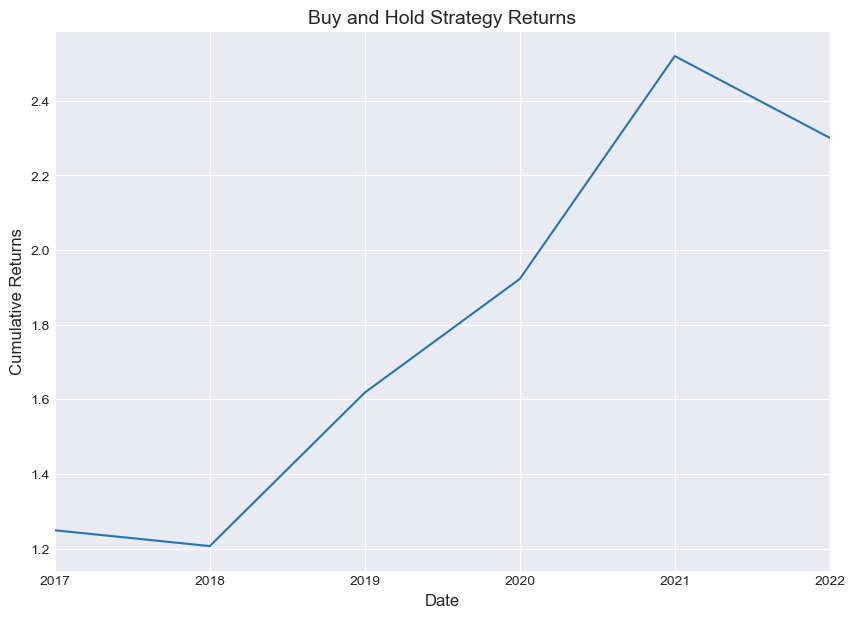

In [132]:
# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline


# Plot cumulative strategy returns
cum_portfolio_returns.plot(figsize=(10, 7))

# Set title and labels for the plot
plt.title('Buy and Hold Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.show()

In [181]:
top_49= ['MSFT','AAPL','GOOG','GOOGL','AMZN','NVDA','META','TSLA','LLY','AVGO','V','JPM','UNH','WMT','MA','JNJ','XOM','HD','PG','COST','ORCL','MRK','ABBV','AMD','ADBE','CRM','CVX','KO','BAC','ACN','PEP','MCD','TMO','NFLX','CSCO','INTC','ABT','LIN','TMUS','WFC','INTU','CMCSA','DHR','DIS','QCOM','VZ','AMGN','PFE','TXN']
top_19 = ['MSFT','AAPL','GOOG','GOOGL','AMZN','NVDA','META','TSLA','LLY','AVGO','V','JPM','UNH','WMT','MA','JNJ','XOM','HD','PG']
data_49 = yf.download(top_49, start = "2022-04-30" , end = "2023-04-30" )
data_19 = yf.download(top_19, start = "2022-04-30" , end = "2023-04-30")

[*********************100%%**********************]  49 of 49 completed
[*********************100%%**********************]  19 of 19 completed


In [251]:
data_49['Adj Close']['ABT']


Date
2022-05-02    109.083450
2022-05-03    108.696724
2022-05-04    111.858154
2022-05-05    109.257477
2022-05-06    108.542046
                 ...    
2023-04-24    108.742859
2023-04-25    108.319313
2023-04-26    107.117630
2023-04-27    107.856361
2023-04-28    108.811806
Name: ABT, Length: 250, dtype: float64

In [246]:
data_19['Adj Close']

,AAPL,AMZN,AVGO,GOOG,GOOGL,HD,JNJ,JPM,LLY,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,
2022-05-02,156.374557,124.500000,549.657349,117.156998,116.583000,293.087921,170.024582,114.205643,284.046539,355.182709,211.130005,279.929871,195.094223,151.424835,300.980011,488.916626,208.626740,147.950012,81.259903
2022-05-03,157.879303,124.253502,554.254089,118.129501,117.334000,291.168762,169.691452,116.651886,282.584991,353.946106,212.029999,277.282806,195.783386,149.350128,303.083344,487.423920,205.697495,148.465958,82.933815
2022-05-04,164.353668,125.928497,575.702515,122.574997,122.261002,301.050720,171.509354,120.510887,289.284912,364.560883,223.410004,285.351898,203.094543,150.449631,317.540009,495.228668,211.575699,150.520004,86.234619
2022-05-05,155.196503,116.406998,553.128784,116.746498,116.505501,285.583313,168.235260,117.495735,286.803040,349.573608,208.279999,272.923523,188.212509,147.677002,291.093323,482.643524,202.423065,149.230347,84.927460
2022-05-06,155.930130,114.772499,553.233704,115.660004,115.746498,281.000397,167.864059,117.306122,291.246826,343.390808,203.770004,270.345306,186.524551,149.149338,288.549988,487.423920,200.036285,146.123413,86.225212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,164.662064,106.209999,624.885010,106.779999,105.970001,295.598785,160.001968,137.896011,380.833893,373.059235,212.789993,279.993073,270.345978,153.427597,162.550003,483.403717,231.378494,151.081696,115.177139
2023-04-25,163.108353,102.570000,612.555542,104.610001,103.849998,290.395111,161.468262,134.897644,382.314117,366.886871,207.550003,273.683167,262.338165,153.466858,160.669998,486.350006,228.227295,149.904785,113.540108
2023-04-26,163.098389,104.980003,606.814209,104.449997,103.709999,282.300537,158.965775,132.506775,373.800354,365.124786,209.399994,293.507294,269.486206,151.690659,153.750000,477.481567,226.795837,149.252029,112.497482


In [145]:
data_49.tail()

Adj Close                                                  \
                  AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2023-04-24  164.662064  159.152084  108.742859  274.105499  377.339996   
2023-04-25  163.108353  159.947464  108.319313  267.629791  369.589996   
2023-04-26  163.098389  156.940567  107.117630  268.133972  363.059998   
2023-04-27  167.729614  144.398895  107.856361  272.325928  371.420013   
2023-04-28  168.994461  146.581314  108.811806  277.111023  377.559998   

                                                                      ...  \
                  AMD        AMGN        AMZN        AVGO        BAC  ...   
Date                                                                  ...   
2023-04-24  87.570000  238.344757  106.209999  624.885010  29.048553  ...   
2023-04-25  83.800003  238.754272  102.570000  612.555542  28.150545  ...   
2023-04-26  85.940002  232.835892  104.980003  606.814209  27.760111  ...   
2023-04-27  87.440002  234.337402  109.820000  609.000427  28.199352  ...   
2023-04-28  89.370003  233.752411  105.449997  616.967346  28.580030  ...   

             Volume                                                            \
                TMO     TMUS       TSLA      TXN      UNH         V        VZ   
Date                                                                            
2023-04-24   895100  3889300  140006600  3360100  2322400   9124100  20362500   
2023-04-25  2495500  6394500  121999300  7136000  2937300   6076500  24959400   
2023-04-26  4020100  4522500  153364100  8647500  2930000   8400400  21499300   
2023-04-27  2148400  6332800  127015200  6697900  2473200   7128200  28841000   
2023-04-28  2046900  9431700  122515800  6574400  2398400  11627900  19194400   

                                         
                 WFC      WMT       XOM  
Date                                     
2023-04-24  17327800  4526500  15831300  
2023-04-25  20728000  5748900  12179800  
2023-04-26  26915600  4303400  15566100  
2023-04-27  21695800  4287000  16279200  
2023-04-28  20189300  4693900  24374000  

[5 rows x 294 columns]

In [162]:

data_19.iloc[:,:114]

Adj Close                                                  \
                  AAPL        AMZN        AVGO        GOOG       GOOGL   
Date                                                                     
2022-05-02  156.374557  124.500000  549.657349  117.156998  116.583000   
2022-05-03  157.879303  124.253502  554.254089  118.129501  117.334000   
2022-05-04  164.353668  125.928497  575.702515  122.574997  122.261002   
2022-05-05  155.196503  116.406998  553.128784  116.746498  116.505501   
2022-05-06  155.930130  114.772499  553.233704  115.660004  115.746498   
...                ...         ...         ...         ...         ...   
2023-04-24  164.662064  106.209999  624.885010  106.779999  105.970001   
2023-04-25  163.108353  102.570000  612.555542  104.610001  103.849998   
2023-04-26  163.098389  104.980003  606.814209  104.449997  103.709999   
2023-04-27  167.729614  109.820000  609.000427  108.370003  107.589996   
2023-04-28  168.994461  105.449997  616.967346  108.220001  107.339996   

                                                                        ...  \
                    HD         JNJ         JPM         LLY          MA  ...   
Date                                                                    ...   
2022-05-02  293.087921  170.024582  114.205643  284.046539  355.182709  ...   
2022-05-03  291.168762  169.691452  116.651886  282.584991  353.946106  ...   
2022-05-04  301.050720  171.509354  120.510887  289.284912  364.560883  ...   
2022-05-05  285.583313  168.235260  117.495735  286.803040  349.573608  ...   
2022-05-06  281.000397  167.864059  117.306122  291.246826  343.390808  ...   
...                ...         ...         ...         ...         ...  ...   
2023-04-24  295.598785  160.001968  137.896011  380.833893  373.059235  ...   
2023-04-25  290.395111  161.468262  134.897644  382.314117  366.886871  ...   
2023-04-26  282.300537  158.965775  132.506775  373.800354  365.124786  ...   
2023-04-27  288.043152  159.337265  134.290115  387.787964  372.003967  ...   
2023-04-28  294.520782  160.021515  135.456161  393.261749  378.335602  ...   

             Volume                                                     \
                 MA      META      MSFT      NVDA        PG       TSLA   
Date                                                                     
2022-05-02  3903800  49915300  35151100  57204900  10351600   75781500   
2022-05-03  2686900  41556300  25978600  47575100  10344000   63709500   
2022-05-04  3346600  41375900  33599300  64885500   7771000   81643800   
2022-05-05  3424800  41129200  43260400  62633100   8217100   92519100   
2022-05-06  3635200  34747200  37780300  63329700   7304800   72903000   
...             ...       ...       ...       ...       ...        ...   
2023-04-24  1886300  15750900  26611000  33928200   8109800  140006600   
2023-04-25  2245000  19198200  45772200  37852700   8341800  121999300   
2023-04-26  2594200  41992700  64599200  40633700   4843700  153364100   
2023-04-27  3859900  71196500  46462600  37716100   4805600  127015200   
2023-04-28  3107300  39554000  36446700  29168700   5754000  122515800   

                                                   
                UNH         V       WMT       XOM  
Date                                               
2022-05-02  3184300   8803700   6672000  36335200  
2022-05-03  2763400   6616900   5983500  33908100  
2022-05-04  4002600   7191100   6674200  46188400  
2022-05-05  3359700   7749600   7744800  41013400  
2022-05-06  3260300   8825300  11419400  29619300  
...             ...       ...       ...       ...  
2023-04-24  2322400   9124100   4526500  15831300  
2023-04-25  2937300   6076500   5748900  12179800  
2023-04-26  2930000   8400400   4303400  15566100  
2023-04-27  2473200   7128200   4287000  16279200  
2023-04-28  2398400  11627900   4693900  24374000  

[250 rows x 114 columns]

In [225]:
print(data_49['Adj Close'].columns)

Index(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AMD', 'AMGN', 'AMZN', 'AVGO',
       'BAC', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVX', 'DHR', 'DIS', 'GOOG',
       'GOOGL', 'HD', 'INTC', 'INTU', 'JNJ', 'JPM', 'KO', 'LIN', 'LLY', 'MA',
       'MCD', 'META', 'MRK', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'PEP', 'PFE',
       'PG', 'QCOM', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'V', 'VZ', 'WFC',
       'WMT', 'XOM'],
      dtype='object')


In [268]:
import pandas as pd
import pandas_ta as ta

tickers = ['MSFT', 'AAPL', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'LLY', 'AVGO', 'V', 'JPM', 'UNH', 'WMT', 'MA', 'JNJ', 'XOM', 'HD', 'PG', 'COST', 'ORCL', 'MRK', 'ABBV', 'AMD', 'ADBE', 'CRM', 'CVX', 'KO', 'BAC', 'ACN', 'PEP', 'MCD', 'TMO', 'NFLX', 'CSCO', 'INTC', 'ABT', 'LIN', 'TMUS', 'WFC', 'INTU', 'CMCSA', 'DHR', 'DIS', 'QCOM', 'VZ', 'AMGN', 'PFE', 'TXN']
rsi_49 = pd.DataFrame()

for ticker in tickers:
   
    rsi_data = RSI(data_49['Adj Close'],ticker, 20)
    if rsi_data is not None:
        rsi_data = pd.Series(rsi_data.values, name=ticker)
        rsi_49 = pd.concat([rsi_49, rsi_data], axis=1)
    else:
        print(f"RSI data could not be calculated for {ticker}")

print(rsi_49.tail(21))


          MSFT       AAPL       GOOG      GOOGL       AMZN       NVDA  \
229  71.235195  70.849198  63.107363  63.589119  66.249591  71.985468   
230  71.261135  68.809361  64.119981  64.867262  64.520595  71.424297   
231  69.683622  67.459002  63.447681  63.963698  65.129289  74.711758   
232  72.182708  70.846945  66.348172  66.894836  67.356470  72.677755   
233  69.937540  65.897785  65.521391  65.968752  61.066587  65.233581   
234  73.742744  71.402497  73.107562  73.662552  65.458555  71.763547   
235  75.123186  70.248414  72.488700  73.039944  68.865427  77.648619   
236  67.536099  65.809625  70.297583  70.389464  62.131515  74.008893   
237  64.891118  62.015995  66.165633  66.280137  54.834488  64.597848   
238  65.657094  67.309269  66.820805  66.935971  59.182471  63.633049   
239  57.013819  63.846164  63.381177  63.947805  54.112556  58.476102   
240  56.665232  65.514122  55.999997  56.744185  56.496404  58.820263   
241  62.704674  64.256534  54.723130  54.921968  58

In [249]:
rsi_d = data_49['Adj Close']['AAPL'].ta.rsi(length = 20, append = True)
rsi_d.head()

AttributeError: 'Series' object has no attribute 'ta'